In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.216293   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.497498   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.166641   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735229   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.261612   

               Volume    change  instant_return  
Date                                             
2023-01-03  112117500       NaN             NaN  
2023-01-04   89113600  1.290001          0.0103  
2023-01-05   80962700 -1.340004         -0.0107  
2023-01-06   87754700  4.599998          0.0361  
2023-01-09   70790800  0.529999          0.0041  


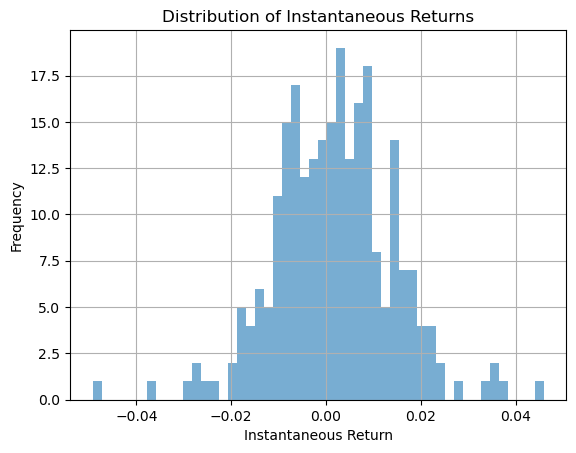

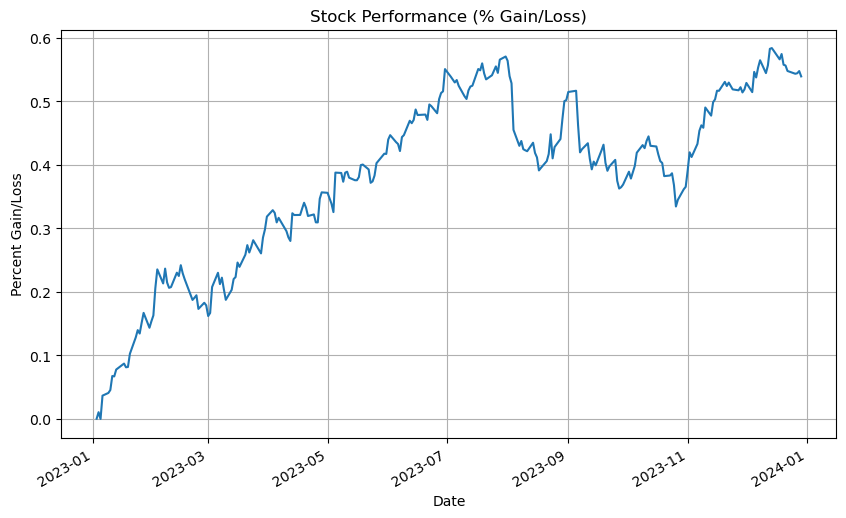

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Stock:
    def __init__(self, symbol):
        self.symbol = symbol
        self.data = None

    def get_data(self, start_date='2023-01-01', end_date='2024-01-01'):
        """
        Fetches historical stock data from Yahoo Finance and stores it in a pandas DataFrame.
        """
        self.data = yf.download(self.symbol, start=start_date, end=end_date)
        self.data.reset_index(inplace=True)
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data.set_index('Date', inplace=True)
        self.calc_returns()

    def calc_returns(self):
        """
        Enriches the DataFrame with 'change' and 'instant_return' columns.
        """
        self.data['change'] = self.data['Close'].diff()
        self.data['instant_return'] = np.log(self.data['Close']).diff().round(4)

    def plot_return_dist(self):
        """
        Plots a histogram of the instantaneous returns.
        """
        self.data['instant_return'].hist(bins=50, alpha=0.6)
        plt.title('Distribution of Instantaneous Returns')
        plt.xlabel('Instantaneous Return')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    def plot_performance(self):
        """
        Plots the stock's performance as a percent gain/loss over the collected data range.
        """
        ((self.data['Close'] / self.data['Close'].iloc[0]) - 1).plot(figsize=(10, 6))
        plt.title('Stock Performance (% Gain/Loss)')
        plt.xlabel('Date')
        plt.ylabel('Percent Gain/Loss')
        plt.grid(True)
        plt.show()

# Example usage:
if __name__ == "__main__":
    stock = Stock('AAPL')  
    stock.get_data(start_date='2023-01-01', end_date='2024-01-01')  # Customize the date range as needed
    print(stock.data.head())  # to access the data attribute
    stock.plot_return_dist()  # to generate histogram of returns
    stock.plot_performance()  # to generate line graph of performance
